In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OrdinalEncoder

In [129]:
pd.options.display.max_rows = None  
pd.options.display.max_columns = None

In [130]:
df = pd.read_csv("synth_data.csv")

In [131]:
df.shape

(10000, 266)

In [132]:
df.head()

,device_type,age,gender,timezone,user_since_days,follows_recommendations,average_mood,active_time_of_day,avg_active_time,user_interest_1,user_interest_2,user_interest_3,latitude,longitude,country,state,social_score,news_score,economics_score,air_quality_index,air_pressure,weather,wind_speed,soc_code,hourly_wage,annual_wage,Administration and Management,Administrative,Economics and Accounting,Sales and Marketing,Customer and Personal Service,Personnel and Human Resources,Production and Processing,Food Production,Computers and Electronics,Engineering and Technology,Design,Building and Construction,Mechanical,Mathematics,Physics,Chemistry,Biology,Psychology,Sociology and Anthropology,Geography,Medicine and Dentistry,Therapy and Counseling,Education and Training,English Language,Foreign Language,Fine Arts,History and Archeology,Philosophy and Theology,Public Safety and Security,Law and Government,Telecommunications,Communications and Media,Transportation,Reading Comprehension,Active Listening,Writing,Speaking,Mathematics_skills,Science,Critical Thinking,Active Learning,Learning Strategies,Monitoring,Social Perceptiveness,Coordination,Persuasion,Negotiation,Instructing,Service Orientation,Complex Problem Solving,Operations Analysis,Technology Design,Equipment Selection,Installation,Programming,Operations Monitoring,Operation and Control,Equipment Maintenance,Troubleshooting,Repairing,Quality Control Analysis,Judgment and Decision Making,Systems Analysis,Systems Evaluation,Time Management,Management of Financial Resources,Management of Material Resources,Management of Personnel Resources,Oral Comprehension,Written Comprehension,Oral Expression,Written Expression,Fluency of Ideas,Originality,Problem Sensitivity,Deductive Reasoning,Inductive Reasoning,Information Ordering,Category Flexibility,Mathematical Reasoning,Number Facility,Memorization,Speed of Closure,Flexibility of Closure,Perceptual Speed,Spatial Orientation,Visualization,Selective Attention,Time Sharing,Arm-Hand Steadiness,Manual Dexterity,Finger Dexterity,Control Precision,Multilimb Coordination,Response Orientation,Rate Control,Reaction Time,Wrist-Finger Speed,Speed of Limb Movement,Static Strength,Explosive Strength,Dynamic Strength,Trunk Strength,Stamina,Extent Flexibility,Dynamic Flexibility,Gross Body Coordination,Gross Body Equilibrium,Near Vision,Far Vision,Visual Color Discrimination,Night Vision,Peripheral Vision,Depth Perception,Glare Sensitivity,Hearing Sensitivity,Auditory Attention,Sound Localization,Speech Recognition,Speech Clarity,Administration and Management_knowledge,Administrative_knowledge,Economics and Accounting_knowledge,Sales and Marketing_knowledge,Customer and Personal Service_knowledge,Personnel and Human Resources_knowledge,Production and Processing_knowledge,Food Production_knowledge,Computers and Electronics_knowledge,Engineering and Technology_knowledge,Design_knowledge,Building and Construction_knowledge,Mechanical_knowledge,Mathematics_knowledge,Physics_knowledge,Chemistry_knowledge,Biology_knowledge,Psychology_knowledge,Sociology and Anthropology_knowledge,Geography_knowledge,Medicine and Dentistry_knowledge,Therapy and Counseling_knowledge,Education and Training_knowledge,English Language_knowledge,Foreign Language_knowledge,Fine Arts_knowledge,History and Archeology_knowledge,Philosophy and Theology_knowledge,Public Safety and Security_knowledge,Law and Government_knowledge,Telecommunications_knowledge,Communications and Media_knowledge,Transportation_knowledge,Reading Comprehension_skills,Active Listening_skills,Writing_skills,Speaking_skills,Mathematics_skills.1,Science_skills,Critical Thinking_skills,Active Learning_skills,Learning Strategies_skills,Monitoring_skills,Social Perceptiveness_skills,Coordination_skills,Persuasion_skills,Negotiation_skills,Instructing_skills,Service Orientation_skills,Complex Problem Solving_skills,Operations Analysis_skills,Technology Design_skills,Equipment Selection_skills,Installation_skills,Programm

In [133]:
# sort df cols alphabetically
df = df.reindex(sorted(df.columns), axis=1)

In [134]:
df.describe()

,Active Learning,Active Learning_skills,Active Listening,Active Listening_skills,Administration and Management,Administration and Management_knowledge,Administrative,Administrative_knowledge,Arm-Hand Steadiness,Arm-Hand Steadiness_abilities,Auditory Attention,Auditory Attention_abilities,Biology,Biology_knowledge,Building and Construction,Building and Construction_knowledge,Category Flexibility,Category Flexibility_abilities,Chemistry,Chemistry_knowledge,Communications and Media,Communications and Media_knowledge,Complex Problem Solving,Complex Problem Solving_skills,Computers and Electronics,Computers and Electronics_knowledge,Control Precision,Control Precision_abilities,Coordination,Coordination_skills,Critical Thinking,Critical Thinking_skills,Customer and Personal Service,Customer and Personal Service_knowledge,Deductive Reasoning,Deductive Reasoning_abilities,Depth Perception,Depth Perception_abilities,Design,Design_knowledge,Dynamic Flexibility,Dynamic Flexibility_abilities,Dynamic Strength,Dynamic Strength_abilities,Economics and Accounting,Economics and Accounting_knowledge,Education and Training,Education and Training_knowledge,Engineering and Technology,Engineering and Technology_knowledge,English Language,English Language_knowledge,Equipment Maintenance,Equipment Maintenance_skills,Equipment Selection,Equipment Selection_skills,Explosive Strength,Explosive Strength_abilities,Extent Flexibility,Extent Flexibility_abilities,Far Vision,Far Vision_abilities,Fine Arts,Fine Arts_knowledge,Finger Dexterity,Finger Dexterity_abilities,Flexibility of Closure,Flexibility of Closure_abilities,Fluency of Ideas,Fluency of Ideas_abilities,Food Production,Food Production_knowledge,Foreign Language,Foreign Language_knowledge,Geography,Geography_knowledge,Glare Sensitivity,Glare Sensitivity_abilities,Gross Body Coordination,Gross Body Coordination_abilities,Gross Body Equilibrium,Gross Body Equilibrium_abilities,Hearing Sensitivity,Hearing Sensitivity_abilities,History and Archeology,History and Archeology_knowledge,Inductive Reasoning,Inductive Reasoning_abilities,Information Ordering,Information Ordering_abilities,Installation,Installation_skills,Instructing,Instructing_skills,Judgment and Decision Making,Judgment and Decision Making_skills,Law and Government,Law and Government_knowledge,Learning Strategies,Learning Strategies_skills,Management of Financial Resources,Management of Financial Resources_skills,Management of Material Resources,Management of Material Resources_skills,Management of Personnel Resources,Management of Personnel Resources_skills,Manual Dexterity,Manual Dexterity_abilities,Mathematical Reasoning,Mathematical Reasoning_abilities,Mathematics,Mathematics_knowledge,Mathematics_skills,Mathematics_skills.1,Mechanical,Mechanical_knowledge,Medicine and Dentistry,Medicine and Dentistry_knowledge,Memorization,Memorization_abilities,Monitoring,Monitoring_skills,Multilimb Coordination,Multilimb Coordination_abilities,Near Vision,Near Vision_abilities,Negotiation,Negotiation_skills,Night Vision,Night Vision_abilities,Number Facility,Number Facility_abilities,Operation and Control,Operation and Control_skills,Operations Analysis,Operations Analysis_skills,Operations Monitoring,Operations Monitoring_skills,Oral Comprehension,Oral Comprehension_abilities,Oral Expression,Oral Expression_abilities,Originality,Originality_abilities,Perceptual Speed,Perceptual Speed_abilities,Peripheral Vision,Peripheral Vision_abilities,Personnel and Human Resources,Personnel and Human Resources_knowledge,Persuasion,Persuasion_skills,Philosophy and Theology,Philosophy and Theology_knowledge,Physics,Physics_knowledge,Problem Sensitivity,Problem Sensitivity_abilities,Production and Processing,Production and Processing_knowledge,Programming,Programming_skills,Psychology,Psychology_knowledge,Public Safety and Security,Public Safety and Security_knowledge,Quality Control Analysis,Quality Control Analysis_skills,Rate Control,Rate Control_abilities,R

In [135]:
# List of categorical columns
categorical = ['device_type', 'age', 'gender', 'timezone', 'country', 'state', 
               'weather', 'soc_code','user_interest_1','user_interest_2','user_interest_3']

# Create ordinal encoder
encoder = OrdinalEncoder()

# Encode categorical columns
df[categorical] = encoder.fit_transform(df[categorical])

<Axes: >

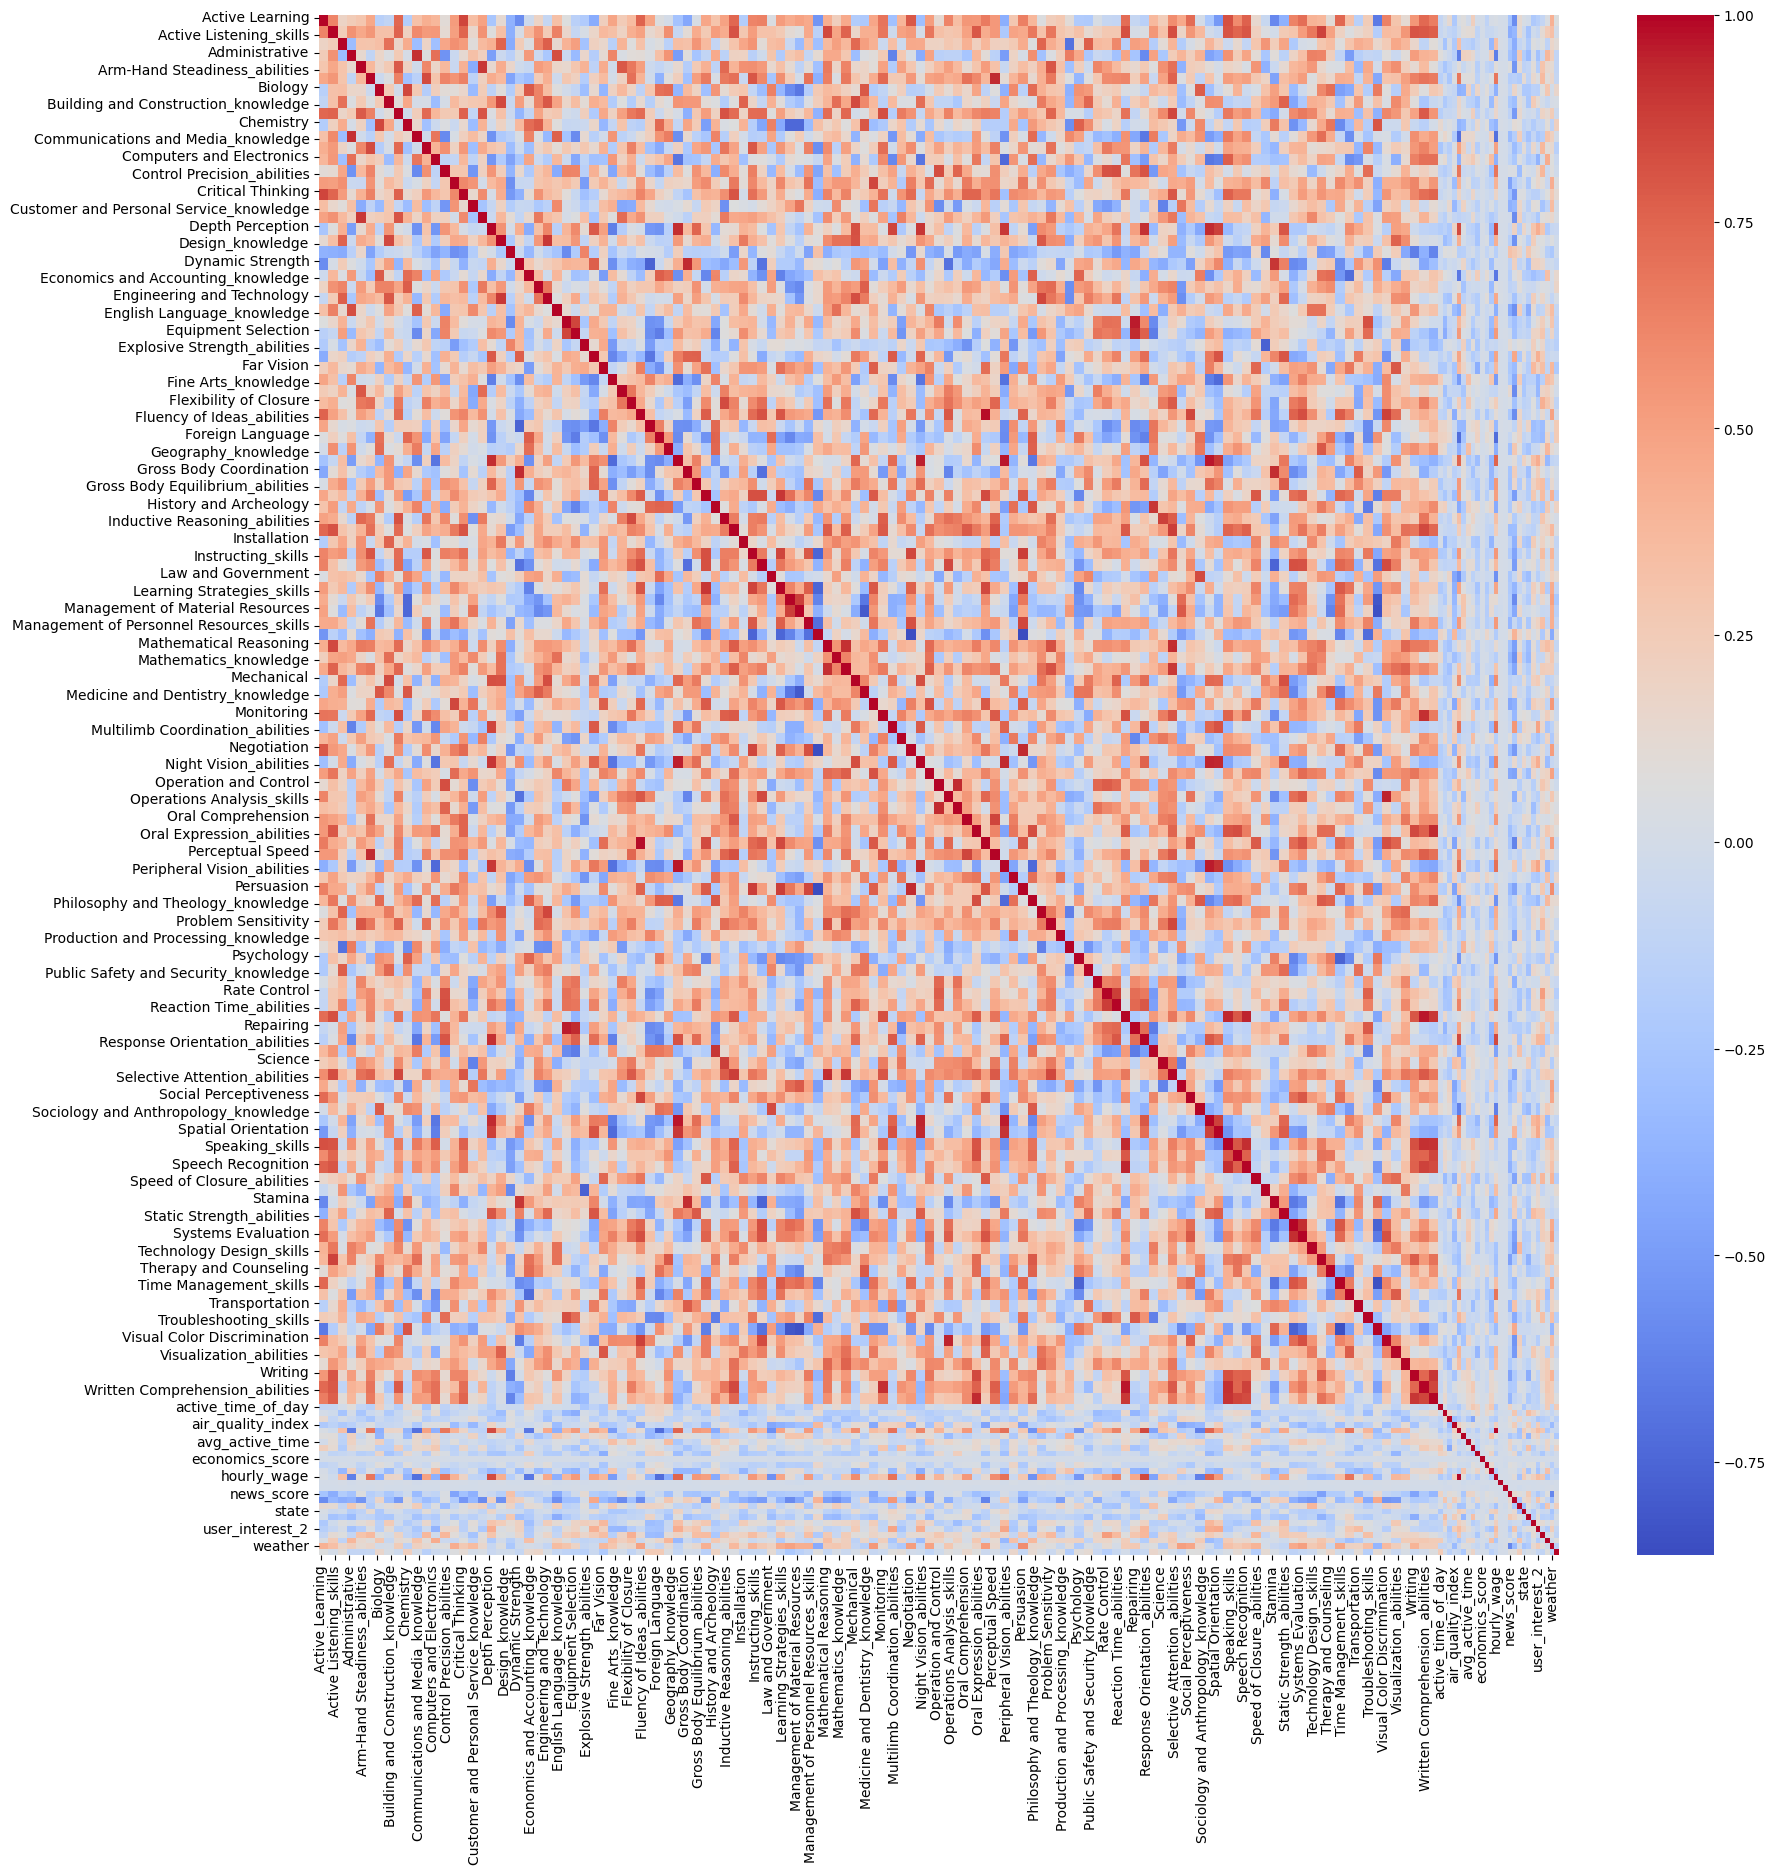

In [136]:
# get correlation matrix

corr = df.corr()

# plot correlation matrix

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm')

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV ,  TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from scipy.stats import zscore
import random

2023-08-23 17:56:17.954979: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 17:56:18.007978: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 17:56:18.008404: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 17:56:19.231763: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
kpis = ['economics_score','social_score','news_score']

In [12]:
n = len(df)  # Number of rows in the DataFrame
dates = pd.date_range(start='2000-01-01', periods=n)  # Generate synthetic time with daily frequency
reversed_dates = dates[::-1]  # Reverse the dates index
df['Date'] = reversed_dates  # Assign it to the DataFram

In [13]:
df['DayofWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [14]:
df.head()

,Active Learning,Active Learning_skills,Active Listening,Active Listening_skills,Administration and Management,Administration and Management_knowledge,Administrative,Administrative_knowledge,Arm-Hand Steadiness,Arm-Hand Steadiness_abilities,Auditory Attention,Auditory Attention_abilities,Biology,Biology_knowledge,Building and Construction,Building and Construction_knowledge,Category Flexibility,Category Flexibility_abilities,Chemistry,Chemistry_knowledge,Communications and Media,Communications and Media_knowledge,Complex Problem Solving,Complex Problem Solving_skills,Computers and Electronics,Computers and Electronics_knowledge,Control Precision,Control Precision_abilities,Coordination,Coordination_skills,Critical Thinking,Critical Thinking_skills,Customer and Personal Service,Customer and Personal Service_knowledge,Deductive Reasoning,Deductive Reasoning_abilities,Depth Perception,Depth Perception_abilities,Design,Design_knowledge,Dynamic Flexibility,Dynamic Flexibility_abilities,Dynamic Strength,Dynamic Strength_abilities,Economics and Accounting,Economics and Accounting_knowledge,Education and Training,Education and Training_knowledge,Engineering and Technology,Engineering and Technology_knowledge,English Language,English Language_knowledge,Equipment Maintenance,Equipment Maintenance_skills,Equipment Selection,Equipment Selection_skills,Explosive Strength,Explosive Strength_abilities,Extent Flexibility,Extent Flexibility_abilities,Far Vision,Far Vision_abilities,Fine Arts,Fine Arts_knowledge,Finger Dexterity,Finger Dexterity_abilities,Flexibility of Closure,Flexibility of Closure_abilities,Fluency of Ideas,Fluency of Ideas_abilities,Food Production,Food Production_knowledge,Foreign Language,Foreign Language_knowledge,Geography,Geography_knowledge,Glare Sensitivity,Glare Sensitivity_abilities,Gross Body Coordination,Gross Body Coordination_abilities,Gross Body Equilibrium,Gross Body Equilibrium_abilities,Hearing Sensitivity,Hearing Sensitivity_abilities,History and Archeology,History and Archeology_knowledge,Inductive Reasoning,Inductive Reasoning_abilities,Information Ordering,Information Ordering_abilities,Installation,Installation_skills,Instructing,Instructing_skills,Judgment and Decision Making,Judgment and Decision Making_skills,Law and Government,Law and Government_knowledge,Learning Strategies,Learning Strategies_skills,Management of Financial Resources,Management of Financial Resources_skills,Management of Material Resources,Management of Material Resources_skills,Management of Personnel Resources,Management of Personnel Resources_skills,Manual Dexterity,Manual Dexterity_abilities,Mathematical Reasoning,Mathematical Reasoning_abilities,Mathematics,Mathematics_knowledge,Mathematics_skills,Mathematics_skills.1,Mechanical,Mechanical_knowledge,Medicine and Dentistry,Medicine and Dentistry_knowledge,Memorization,Memorization_abilities,Monitoring,Monitoring_skills,Multilimb Coordination,Multilimb Coordination_abilities,Near Vision,Near Vision_abilities,Negotiation,Negotiation_skills,Night Vision,Night Vision_abilities,Number Facility,Number Facility_abilities,Operation and Control,Operation and Control_skills,Operations Analysis,Operations Analysis_skills,Operations Monitoring,Operations Monitoring_skills,Oral Comprehension,Oral Comprehension_abilities,Oral Expression,Oral Expression_abilities,Originality,Originality_abilities,Perceptual Speed,Perceptual Speed_abilities,Peripheral Vision,Peripheral Vision_abilities,Personnel and Human Resources,Personnel and Human Resources_knowledge,Persuasion,Persuasion_skills,Philosophy and Theology,Philosophy and Theology_knowledge,Physics,Physics_knowledge,Problem Sensitivity,Problem Sensitivity_abilities,Production and Processing,Production and Processing_knowledge,Programming,Programming_skills,Psychology,Psychology_knowledge,Public Safety and Security,Public Safety and Security_knowledge,Quality Control Analysis,Quality Control Analysis_skills,Rate Control,Rate Control_abilities,R

In [15]:
target = kpis[0]
y = df[target]
X = df.drop([target,'Date'], axis=1)

# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [362]:
rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)

In [366]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=42)

In [16]:
import pickle
filename = f'{kpis[0]}_model.sav'
# pickle.dump(rf, open(filename, 'wb'))

In [17]:
rf = pickle.load(open(filename, 'rb'))

In [18]:
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.0009934456287504806

In [19]:
# Get feature importances
importances = rf.feature_importances_

# Associate the importances with the corresponding features
features = pd.DataFrame(data = {'feature':X_train.columns, 'importance':importances})

# Sort by importance
features.sort_values(by='importance', ascending=False, inplace=True)

features

,feature,importance
253,longitude,1.032402e-02
212,Technology Design,7.734187e-03
240,active_time_of_day,7.550214e-03
213,Technology Design_skills,7.024963e-03
252,latitude,6.951389e-03
76,Glare Sensitivity,6.796333e-03
116,Medicine and Dentistry,6.611797e-03
74,Geography,6.392453e-03
245,average_mood,6.228794e-03
192,Spatial Orientation,6.190161e-03


In [20]:
top_10 = features.head(3)

In [21]:
eco_kpi_df = df[top_10["feature"].tolist() ]

In [22]:
eco_kpi_df.head()

,longitude,Technology Design,active_time_of_day
0,0.001251,-0.000272,2.035302
1,0.001154,0.001539,1.500274
2,0.000759,0.000035,1.764249
3,0.000581,-0.000220,0.139155
4,-0.000331,-0.000602,1.089066


<Axes: >

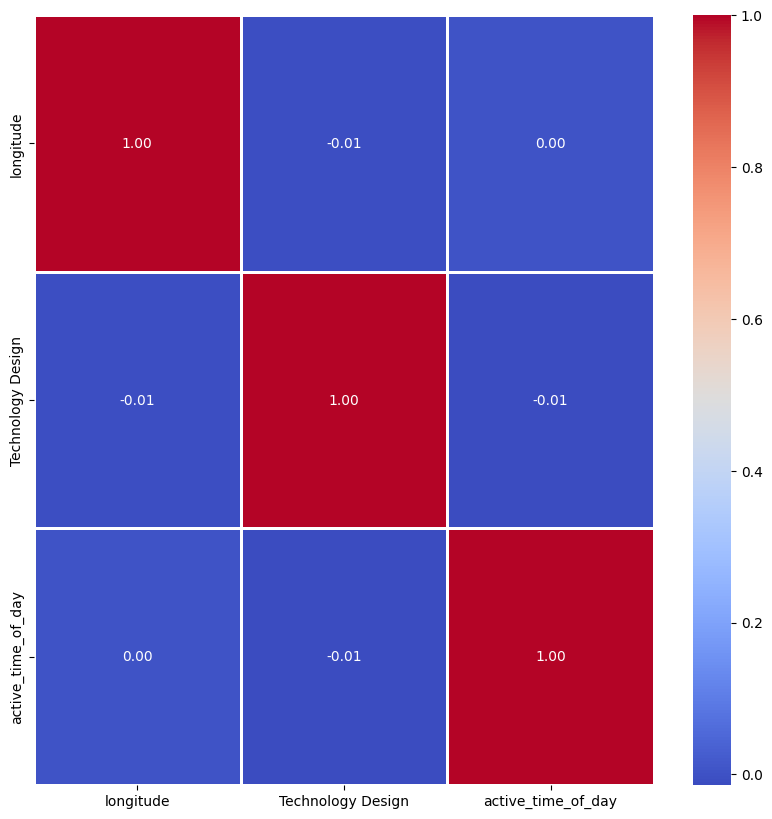

In [23]:
eco_corr = eco_kpi_df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(eco_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)

In [24]:
# Calculate the percent change for each of the top features
pct_change = {}
for feature in top_10["feature"]:
    pct_change[feature + '_percent_change'] = eco_kpi_df[feature].pct_change(periods=30)

mean_pct_change = pd.DataFrame(data = pct_change).mean()
std_pct_change = pd.DataFrame(data = pct_change).std()
median_pct_change = pd.DataFrame(data = pct_change).median()
    



In [25]:
pct_change_stats = []
for i in range(0, len(mean_pct_change)):
    pct_change_stats.append(f"The mean percent change for {mean_pct_change.index[i].split('_percent')[0]} is {mean_pct_change[i]} for a 30 day period over the last {df['Year'].max() - df['Year'].min()} years")
    pct_change_stats.append(f"The standard deviation of percent change for {mean_pct_change.index[i].split('_percent')[0]} is {std_pct_change[i]} for a 30 day period over the last {df['Year'].max() - df['Year'].min()} years")
    pct_change_stats.append(f"The median percent change for {mean_pct_change.index[i].split('_percent')[0]} is {median_pct_change[i]} for a 30 day period over the last {df['Year'].max() - df['Year'].min()} years")

In [26]:
len(pct_change_stats)

9

In [27]:
pct_change_stats

['The mean percent change for longitude is -1.1373072021730741 for a 30 day period over the last 27 years',
 'The standard deviation of percent change for longitude is 40.847826892175384 for a 30 day period over the last 27 years',
 'The median percent change for longitude is -1.0163568907248353 for a 30 day period over the last 27 years',
 'The mean percent change for Technology Design is 2.611528422055358 for a 30 day period over the last 27 years',
 'The standard deviation of percent change for Technology Design is 520.7752359686624 for a 30 day period over the last 27 years',
 'The median percent change for Technology Design is -0.00033654093176738176 for a 30 day period over the last 27 years',
 'The mean percent change for active_time_of_day is -28.789432055125825 for a 30 day period over the last 27 years',
 'The standard deviation of percent change for active_time_of_day is 3711.6736496481794 for a 30 day period over the last 27 years',
 'The median percent change for active_ti

In [83]:
pct_change_stats = " ".join(pct_change_stats)

In [84]:
pct_change_stats

'The mean percent change for longitude is -1.1373072021730741 for a 30 day period over the last 27 years The standard deviation of percent change for longitude is 40.847826892175384 for a 30 day period over the last 27 years The median percent change for longitude is -1.0163568907248353 for a 30 day period over the last 27 years The mean percent change for Technology Design is 2.611528422055358 for a 30 day period over the last 27 years The standard deviation of percent change for Technology Design is 520.7752359686624 for a 30 day period over the last 27 years The median percent change for Technology Design is -0.00033654093176738176 for a 30 day period over the last 27 years The mean percent change for active_time_of_day is -28.789432055125825 for a 30 day period over the last 27 years The standard deviation of percent change for active_time_of_day is 3711.6736496481794 for a 30 day period over the last 27 years The median percent change for active_time_of_day is -4.572906291072654e-

In [28]:
# Filter the DataFrame to only include categorical features
categorical_df = features[features['feature'].isin(categorical)]

# Get the top 3 categorical features
top_categorical = categorical_df.head(1)['feature'].tolist()

print(top_categorical)

['user_interest_2']


In [29]:
categorical_pct_change = []
for category in top_categorical:
    print(category)
    df_copy = df.copy()
    # Decode columns
    decoded_data = encoder.inverse_transform(df[categorical])

    # Replace encoded columns with decoded ones  
    df_copy[categorical] = decoded_data

    grouped_df = df_copy.groupby(category)[top_10["feature"].tolist()].agg(['mean', 'std', 'median']).agg(['mean'])
    

    for index, row in grouped_df.iterrows():
        for column in grouped_df.columns:
            mean = row[(column[0], 'mean')]
            std = row[(column[0], 'std')]
            median = row[(column[0], 'median')]
            sent = f"The mean of {column[0]} for {category} is {mean}, the standard deviation is {std}, and the median is {median}."
            categorical_pct_change.append(sent)


user_interest_2


In [30]:
categorical_pct_change = set(categorical_pct_change)

In [32]:
len(categorical_pct_change)

3

In [31]:
categorical_pct_change_statement = " ".join(categorical_pct_change)

In [32]:
categorical_pct_change_statement

'The mean of longitude for user_interest_2 is 1.8928437729295924e-05, the standard deviation is 0.0010002540102235615, and the median is 1.4931981223865699e-05. The mean of Technology Design for user_interest_2 is 0.4541909824414676, the standard deviation is 0.3146510327374309, and the median is 0.45795855480641406. The mean of active_time_of_day for user_interest_2 is 1.809334880014585, the standard deviation is 0.639827760229662, and the median is 1.902355920744486.'

In [33]:
df.head()
df.set_index('Date', inplace=True, drop=True)

In [34]:
df.head()

,Active Learning,Active Learning_skills,Active Listening,Active Listening_skills,Administration and Management,Administration and Management_knowledge,Administrative,Administrative_knowledge,Arm-Hand Steadiness,Arm-Hand Steadiness_abilities,Auditory Attention,Auditory Attention_abilities,Biology,Biology_knowledge,Building and Construction,Building and Construction_knowledge,Category Flexibility,Category Flexibility_abilities,Chemistry,Chemistry_knowledge,Communications and Media,Communications and Media_knowledge,Complex Problem Solving,Complex Problem Solving_skills,Computers and Electronics,Computers and Electronics_knowledge,Control Precision,Control Precision_abilities,Coordination,Coordination_skills,Critical Thinking,Critical Thinking_skills,Customer and Personal Service,Customer and Personal Service_knowledge,Deductive Reasoning,Deductive Reasoning_abilities,Depth Perception,Depth Perception_abilities,Design,Design_knowledge,Dynamic Flexibility,Dynamic Flexibility_abilities,Dynamic Strength,Dynamic Strength_abilities,Economics and Accounting,Economics and Accounting_knowledge,Education and Training,Education and Training_knowledge,Engineering and Technology,Engineering and Technology_knowledge,English Language,English Language_knowledge,Equipment Maintenance,Equipment Maintenance_skills,Equipment Selection,Equipment Selection_skills,Explosive Strength,Explosive Strength_abilities,Extent Flexibility,Extent Flexibility_abilities,Far Vision,Far Vision_abilities,Fine Arts,Fine Arts_knowledge,Finger Dexterity,Finger Dexterity_abilities,Flexibility of Closure,Flexibility of Closure_abilities,Fluency of Ideas,Fluency of Ideas_abilities,Food Production,Food Production_knowledge,Foreign Language,Foreign Language_knowledge,Geography,Geography_knowledge,Glare Sensitivity,Glare Sensitivity_abilities,Gross Body Coordination,Gross Body Coordination_abilities,Gross Body Equilibrium,Gross Body Equilibrium_abilities,Hearing Sensitivity,Hearing Sensitivity_abilities,History and Archeology,History and Archeology_knowledge,Inductive Reasoning,Inductive Reasoning_abilities,Information Ordering,Information Ordering_abilities,Installation,Installation_skills,Instructing,Instructing_skills,Judgment and Decision Making,Judgment and Decision Making_skills,Law and Government,Law and Government_knowledge,Learning Strategies,Learning Strategies_skills,Management of Financial Resources,Management of Financial Resources_skills,Management of Material Resources,Management of Material Resources_skills,Management of Personnel Resources,Management of Personnel Resources_skills,Manual Dexterity,Manual Dexterity_abilities,Mathematical Reasoning,Mathematical Reasoning_abilities,Mathematics,Mathematics_knowledge,Mathematics_skills,Mathematics_skills.1,Mechanical,Mechanical_knowledge,Medicine and Dentistry,Medicine and Dentistry_knowledge,Memorization,Memorization_abilities,Monitoring,Monitoring_skills,Multilimb Coordination,Multilimb Coordination_abilities,Near Vision,Near Vision_abilities,Negotiation,Negotiation_skills,Night Vision,Night Vision_abilities,Number Facility,Number Facility_abilities,Operation and Control,Operation and Control_skills,Operations Analysis,Operations Analysis_skills,Operations Monitoring,Operations Monitoring_skills,Oral Comprehension,Oral Comprehension_abilities,Oral Expression,Oral Expression_abilities,Originality,Originality_abilities,Perceptual Speed,Perceptual Speed_abilities,Peripheral Vision,Peripheral Vision_abilities,Personnel and Human Resources,Personnel and Human Resources_knowledge,Persuasion,Persuasion_skills,Philosophy and Theology,Philosophy and Theology_knowledge,Physics,Physics_knowledge,Problem Sensitivity,Problem Sensitivity_abilities,Production and Processing,Production and Processing_knowledge,Programming,Programming_skills,Psychology,Psychology_knowledge,Public Safety and Security,Public Safety and Security_knowledge,Quality Control Analysis,Quality Control Analysis_skills,Rate Control,Rate Control_abilities,R

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose each of the top features to extract the trend
for feature in top_10["feature"]:
    result = seasonal_decompose(eco_kpi_df[feature], model='additive', period=1)
    eco_kpi_df[feature + '_trend'] = result.trend

# Now let's calculate the mean, median and std deviation of these trends
trend_stats = {}
for feature in top_10["feature"]:
    trend_stats[feature + '_mean_trend'] = eco_kpi_df[feature + '_trend'].mean()
    trend_stats[feature + '_median_trend'] = eco_kpi_df[feature + '_trend'].median()
    trend_stats[feature + '_std_deviation_trend'] = eco_kpi_df[feature + '_trend'].std()




/tmp/ipykernel_23391/1067771659.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco_kpi_df[feature + '_trend'] = result.trend
/tmp/ipykernel_23391/1067771659.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco_kpi_df[feature + '_trend'] = result.trend
/tmp/ipykernel_23391/1067771659.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [36]:
tred_stats_statement = []
for key, value in trend_stats.items():
    if key.count('mean') > 0:
        key = key.split("_mean")[0]
        tred_stats_statement.append(f"The mean of seasonal decomposition trend  of {key} is {value} over the last {df['Year'].max() - df['Year'].min()} years. per day")
    elif key.count('median') > 0:
        key = key.split("_median")[0]
        tred_stats_statement.append(f"The median of seasonal decomposition trend  of {key} is {value} over the last {df['Year'].max() - df['Year'].min()} years. per day")
    elif key.count('std') > 0:
        key = key.split("_std_deviation")[0]
        tred_stats_statement.append(f"The standard deviation of seasonal decomposition trend  of {key} is {value} over the last {df['Year'].max() - df['Year'].min()} years. per day")
        

In [37]:
tred_stats_statement 

['The mean of seasonal decomposition trend  of longitude is 1.2786510447443189e-05 over the last 27 years. per day',
 'The median of seasonal decomposition trend  of longitude is 6.748320689552032e-06 over the last 27 years. per day',
 'The standard deviation of seasonal decomposition trend  of longitude is 0.0010013697800812362 over the last 27 years. per day',
 'The mean of seasonal decomposition trend  of Technology Design is 0.5317065155337067 over the last 27 years. per day',
 'The median of seasonal decomposition trend  of Technology Design is 0.7492178174144908 over the last 27 years. per day',
 'The standard deviation of seasonal decomposition trend  of Technology Design is 0.363858718965649 over the last 27 years. per day',
 'The mean of seasonal decomposition trend  of active_time_of_day is 1.7968805424530367 over the last 27 years. per day',
 'The median of seasonal decomposition trend  of active_time_of_day is 1.9995153593049442 over the last 27 years. per day',
 'The stand

In [38]:
tred_stats_statement = " ".join(tred_stats_statement)

In [39]:
eco_kpi_df.head()

,longitude,Technology Design,active_time_of_day,longitude_trend,Technology Design_trend,active_time_of_day_trend
0,0.001251,-0.000272,2.035302,0.001251,-0.000272,2.035302
1,0.001154,0.001539,1.500274,0.001154,0.001539,1.500274
2,0.000759,0.000035,1.764249,0.000759,0.000035,1.764249
3,0.000581,-0.000220,0.139155,0.000581,-0.000220,0.139155
4,-0.000331,-0.000602,1.089066,-0.000331,-0.000602,1.089066


In [40]:
# Create sentences based on feature importances
statements = top_10.apply(lambda row: 
                                          f"For every unit increase in {row['feature']}, the economics_score increases by {row['importance']} units on average.", 
                                          axis=1).tolist()

In [41]:
statements

['For every unit increase in longitude, the economics_score increases by 0.010324020069929928 units on average.',
 'For every unit increase in Technology Design, the economics_score increases by 0.007734187063724886 units on average.',
 'For every unit increase in active_time_of_day, the economics_score increases by 0.007550213690902798 units on average.']

In [42]:
feature_imp_statements = " ".join(statements)

In [43]:
feature_imp_statements

'For every unit increase in longitude, the economics_score increases by 0.010324020069929928 units on average. For every unit increase in Technology Design, the economics_score increases by 0.007734187063724886 units on average. For every unit increase in active_time_of_day, the economics_score increases by 0.007550213690902798 units on average.'

## Anomaly 

In [44]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_estimators=1000,max_samples='auto',contamination='auto') # this parameter can be tuned based on the percentage of outliers you expect in your data

X = df

outliers = isf.fit_predict(X)

# Assign the anomaly detection output to the dataframe
scores = isf.decision_function(X)

df['anomaly'] = outliers
df['score'] = scores

# Statement about anomalies
num_anomalies = len(df[df['anomaly'] == -1])

print(f"There are {num_anomalies} anomalies detected in the dataset.")


There are 9023 anomalies detected in the dataset.


In [45]:
df.head()

,Active Learning,Active Learning_skills,Active Listening,Active Listening_skills,Administration and Management,Administration and Management_knowledge,Administrative,Administrative_knowledge,Arm-Hand Steadiness,Arm-Hand Steadiness_abilities,Auditory Attention,Auditory Attention_abilities,Biology,Biology_knowledge,Building and Construction,Building and Construction_knowledge,Category Flexibility,Category Flexibility_abilities,Chemistry,Chemistry_knowledge,Communications and Media,Communications and Media_knowledge,Complex Problem Solving,Complex Problem Solving_skills,Computers and Electronics,Computers and Electronics_knowledge,Control Precision,Control Precision_abilities,Coordination,Coordination_skills,Critical Thinking,Critical Thinking_skills,Customer and Personal Service,Customer and Personal Service_knowledge,Deductive Reasoning,Deductive Reasoning_abilities,Depth Perception,Depth Perception_abilities,Design,Design_knowledge,Dynamic Flexibility,Dynamic Flexibility_abilities,Dynamic Strength,Dynamic Strength_abilities,Economics and Accounting,Economics and Accounting_knowledge,Education and Training,Education and Training_knowledge,Engineering and Technology,Engineering and Technology_knowledge,English Language,English Language_knowledge,Equipment Maintenance,Equipment Maintenance_skills,Equipment Selection,Equipment Selection_skills,Explosive Strength,Explosive Strength_abilities,Extent Flexibility,Extent Flexibility_abilities,Far Vision,Far Vision_abilities,Fine Arts,Fine Arts_knowledge,Finger Dexterity,Finger Dexterity_abilities,Flexibility of Closure,Flexibility of Closure_abilities,Fluency of Ideas,Fluency of Ideas_abilities,Food Production,Food Production_knowledge,Foreign Language,Foreign Language_knowledge,Geography,Geography_knowledge,Glare Sensitivity,Glare Sensitivity_abilities,Gross Body Coordination,Gross Body Coordination_abilities,Gross Body Equilibrium,Gross Body Equilibrium_abilities,Hearing Sensitivity,Hearing Sensitivity_abilities,History and Archeology,History and Archeology_knowledge,Inductive Reasoning,Inductive Reasoning_abilities,Information Ordering,Information Ordering_abilities,Installation,Installation_skills,Instructing,Instructing_skills,Judgment and Decision Making,Judgment and Decision Making_skills,Law and Government,Law and Government_knowledge,Learning Strategies,Learning Strategies_skills,Management of Financial Resources,Management of Financial Resources_skills,Management of Material Resources,Management of Material Resources_skills,Management of Personnel Resources,Management of Personnel Resources_skills,Manual Dexterity,Manual Dexterity_abilities,Mathematical Reasoning,Mathematical Reasoning_abilities,Mathematics,Mathematics_knowledge,Mathematics_skills,Mathematics_skills.1,Mechanical,Mechanical_knowledge,Medicine and Dentistry,Medicine and Dentistry_knowledge,Memorization,Memorization_abilities,Monitoring,Monitoring_skills,Multilimb Coordination,Multilimb Coordination_abilities,Near Vision,Near Vision_abilities,Negotiation,Negotiation_skills,Night Vision,Night Vision_abilities,Number Facility,Number Facility_abilities,Operation and Control,Operation and Control_skills,Operations Analysis,Operations Analysis_skills,Operations Monitoring,Operations Monitoring_skills,Oral Comprehension,Oral Comprehension_abilities,Oral Expression,Oral Expression_abilities,Originality,Originality_abilities,Perceptual Speed,Perceptual Speed_abilities,Peripheral Vision,Peripheral Vision_abilities,Personnel and Human Resources,Personnel and Human Resources_knowledge,Persuasion,Persuasion_skills,Philosophy and Theology,Philosophy and Theology_knowledge,Physics,Physics_knowledge,Problem Sensitivity,Problem Sensitivity_abilities,Production and Processing,Production and Processing_knowledge,Programming,Programming_skills,Psychology,Psychology_knowledge,Public Safety and Security,Public Safety and Security_knowledge,Quality Control Analysis,Quality Control Analysis_skills,Rate Control,Rate Control_abilities,R

In [51]:
df_ano = df[df['anomaly'] == 1].copy()
# sort on the scores 
df_ano = df_ano.sort_values("score",ascending=False)
df4=df_ano.head(6).copy()
df4.drop(["score","anomaly"],axis=1,inplace=True)

In [52]:
df4

,Active Learning,Active Learning_skills,Active Listening,Active Listening_skills,Administration and Management,Administration and Management_knowledge,Administrative,Administrative_knowledge,Arm-Hand Steadiness,Arm-Hand Steadiness_abilities,Auditory Attention,Auditory Attention_abilities,Biology,Biology_knowledge,Building and Construction,Building and Construction_knowledge,Category Flexibility,Category Flexibility_abilities,Chemistry,Chemistry_knowledge,Communications and Media,Communications and Media_knowledge,Complex Problem Solving,Complex Problem Solving_skills,Computers and Electronics,Computers and Electronics_knowledge,Control Precision,Control Precision_abilities,Coordination,Coordination_skills,Critical Thinking,Critical Thinking_skills,Customer and Personal Service,Customer and Personal Service_knowledge,Deductive Reasoning,Deductive Reasoning_abilities,Depth Perception,Depth Perception_abilities,Design,Design_knowledge,Dynamic Flexibility,Dynamic Flexibility_abilities,Dynamic Strength,Dynamic Strength_abilities,Economics and Accounting,Economics and Accounting_knowledge,Education and Training,Education and Training_knowledge,Engineering and Technology,Engineering and Technology_knowledge,English Language,English Language_knowledge,Equipment Maintenance,Equipment Maintenance_skills,Equipment Selection,Equipment Selection_skills,Explosive Strength,Explosive Strength_abilities,Extent Flexibility,Extent Flexibility_abilities,Far Vision,Far Vision_abilities,Fine Arts,Fine Arts_knowledge,Finger Dexterity,Finger Dexterity_abilities,Flexibility of Closure,Flexibility of Closure_abilities,Fluency of Ideas,Fluency of Ideas_abilities,Food Production,Food Production_knowledge,Foreign Language,Foreign Language_knowledge,Geography,Geography_knowledge,Glare Sensitivity,Glare Sensitivity_abilities,Gross Body Coordination,Gross Body Coordination_abilities,Gross Body Equilibrium,Gross Body Equilibrium_abilities,Hearing Sensitivity,Hearing Sensitivity_abilities,History and Archeology,History and Archeology_knowledge,Inductive Reasoning,Inductive Reasoning_abilities,Information Ordering,Information Ordering_abilities,Installation,Installation_skills,Instructing,Instructing_skills,Judgment and Decision Making,Judgment and Decision Making_skills,Law and Government,Law and Government_knowledge,Learning Strategies,Learning Strategies_skills,Management of Financial Resources,Management of Financial Resources_skills,Management of Material Resources,Management of Material Resources_skills,Management of Personnel Resources,Management of Personnel Resources_skills,Manual Dexterity,Manual Dexterity_abilities,Mathematical Reasoning,Mathematical Reasoning_abilities,Mathematics,Mathematics_knowledge,Mathematics_skills,Mathematics_skills.1,Mechanical,Mechanical_knowledge,Medicine and Dentistry,Medicine and Dentistry_knowledge,Memorization,Memorization_abilities,Monitoring,Monitoring_skills,Multilimb Coordination,Multilimb Coordination_abilities,Near Vision,Near Vision_abilities,Negotiation,Negotiation_skills,Night Vision,Night Vision_abilities,Number Facility,Number Facility_abilities,Operation and Control,Operation and Control_skills,Operations Analysis,Operations Analysis_skills,Operations Monitoring,Operations Monitoring_skills,Oral Comprehension,Oral Comprehension_abilities,Oral Expression,Oral Expression_abilities,Originality,Originality_abilities,Perceptual Speed,Perceptual Speed_abilities,Peripheral Vision,Peripheral Vision_abilities,Personnel and Human Resources,Personnel and Human Resources_knowledge,Persuasion,Persuasion_skills,Philosophy and Theology,Philosophy and Theology_knowledge,Physics,Physics_knowledge,Problem Sensitivity,Problem Sensitivity_abilities,Production and Processing,Production and Processing_knowledge,Programming,Programming_skills,Psychology,Psychology_knowledge,Public Safety and Security,Public Safety and Security_knowledge,Quality Control Analysis,Quality Control Analysis_skills,Rate Control,Rate Control_abilities,R

In [67]:
!pip install shap tabulate -q


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [55]:
import shap
import random

# create a Tree SHAP explainer
explainer = shap.TreeExplainer(rf)




IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [56]:
shap_values = explainer.shap_values(df4.values)

In [57]:
explainer.expected_value

array([-1.70000011])

In [61]:
top_features = top_10["feature"].tolist()

In [62]:
shap_values.shape

(6, 269)

In [63]:
# Get SHAP values for top 2 features
top_shap_values = shap_values[:, [df4.columns.get_loc(f) for f in top_features]]

# Format as string
shap_values_str = (top_shap_values.tolist())

In [65]:
shap_values_str

[[4.368112288090877e-05, 1.5723478837035647e-06, -3.4777666116758735e-06],
 [5.6882029838848015e-05, 1.5676283037448597e-06, 3.3225790261694173e-06],
 [5.491349327259582e-05, 2.352736568312296e-06, -3.147139453230851e-06],
 [4.8319440495080844e-05, 5.456636274632754e-07, 1.9597166062375728e-06],
 [5.605218210562496e-05, -0.00012412977888664323, -6.835805119936424e-06],
 [4.423675919839194e-05, 3.038545712931093e-06, -1.980028813662642e-06]]

In [74]:
normal_df_stats = df[top_features].describe().to_markdown()
headers = df.columns

combined_str = ""

for i, j in enumerate(zip(df4[top_features].values,shap_values_str)):

  # if i == 4:
  #     break

  combined_str += f"\ndata point {i}:\n"

  for k, val in enumerate(j[0]):
    col_name = headers[k]
    combined_str += f"{col_name}: {val} "

  combined_str+="\n"

  for k , val in enumerate(j[1]):
    col_name = top_features[k]
    combined_str += f"Shap value for {col_name}: {val}, "
feats_str = " , ".join(top_features)

In [75]:
feats_str
combined_str

'\ndata point 0:\nActive Learning: 0.0001589723944163 Active Learning_skills: 0.0001310083266464 Active Listening: 1.999180745132399 \nShap value for longitude: 4.368112288090877e-05, Shap value for Technology Design: 1.5723478837035647e-06, Shap value for active_time_of_day: -3.4777666116758735e-06, \ndata point 1:\nActive Learning: -7.975599753132513e-05 Active Learning_skills: 0.000690786627947 Active Listening: 2.0006073964120485 \nShap value for longitude: 5.6882029838848015e-05, Shap value for Technology Design: 1.5676283037448597e-06, Shap value for active_time_of_day: 3.3225790261694173e-06, \ndata point 2:\nActive Learning: -0.0007866232865122 Active Learning_skills: 0.0008697681193681 Active Listening: 1.9998495117874164 \nShap value for longitude: 5.491349327259582e-05, Shap value for Technology Design: 2.352736568312296e-06, Shap value for active_time_of_day: -3.147139453230851e-06, \ndata point 3:\nActive Learning: 0.0001498412498996 Active Learning_skills: -8.545486573635

In [76]:

# Condense prompt text
prompt = f"""
{normal_df_stats}

{combined_str}

Explain cause of anom for feat {feats_str} using data in generalized statements.
Combine statements per feat, don't write per pt.

START OF EXAMPLE STATEMENT
As fuel price increases the weekly sales decreases
END OF EXAMPLE STATEMENT

"""

print((prompt))


|       |       longitude |   Technology Design |   active_time_of_day |
|:------|----------------:|--------------------:|---------------------:|
| count | 10000           |      10000          |         10000        |
| mean  |     1.27865e-05 |          0.531707   |             1.79688  |
| std   |     0.00100137  |          0.363859   |             0.746532 |
| min   |    -0.00340948  |         -0.00336175 |            -2.47086  |
| 25%   |    -0.000679822 |          0.120735   |             1.00129  |
| 50%   |     6.74832e-06 |          0.749218   |             1.99952  |
| 75%   |     0.000696346 |          0.87889    |             2.00113  |
| max   |     0.0037776   |          1.00284    |             5.45966  |


data point 0:
Active Learning: 0.0001589723944163 Active Learning_skills: 0.0001310083266464 Active Listening: 1.999180745132399 
Shap value for longitude: 4.368112288090877e-05, Shap value for Technology Design: 1.5723478837035647e-06, Shap value for active_time_of_

In [77]:
import os
os.environ["OPENAI_API_KEY"] = "sk-"

In [78]:
import openai
conversation =  [
            {
            "role": "system",
            "content": f"You are a data analyst working on a  model. A client has provided you with a dataset containing various features and their corresponding {kpis[0]}. You have trained a machine learning model and computed permuattion importance values to understand the impact of each feature on the {kpis[0]}. The client has requested statistical statements based on the SHAP values for given data points. Generate informative responses that explain the statistical relationship between the features and the predicted {kpis[0]} based on the provided data and importance values."
            },
            {
            "role": "user",
            "content": prompt
            }
        ]
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=conversation,
    temperature=0,
    max_tokens=1000,
)
print( response.choices[0].message.content)

Based on the provided data and permutation importance values, we can make the following generalized statements about the relationship between the features (longitude, Technology Design, active_time_of_day) and the predicted economics_score:

1. Longitude:
   - The longitude feature has a positive impact on the economics_score. As the longitude value increases, the economics_score tends to increase as well. However, the effect size is relatively small, as indicated by the low magnitude of the SHAP values.

2. Technology Design:
   - The Technology Design feature also has a positive impact on the economics_score. An increase in the Technology Design value is associated with an increase in the economics_score. However, similar to longitude, the effect size is relatively small.

3. Active Time of Day:
   - The active_time_of_day feature has a negative impact on the economics_score. As the active_time_of_day value increases, the economics_score tends to decrease. This suggests that certain 

In [80]:
anomaly_reason_statement = response.choices[0].message.content

In [86]:
stats_str = eco_kpi_df[top_features].describe().to_string()

In [87]:
eco_kpi_df[top_features].describe()

,longitude,Technology Design,active_time_of_day
count,10000.000000,10000.000000,10000.000000
mean,0.000013,0.531707,1.796881
std,0.001001,0.363859,0.746532
min,-0.003409,-0.003362,-2.470863
25%,-0.000680,0.120735,1.001295
50%,0.000007,0.749218,1.999515
75%,0.000696,0.878890,2.001130
max,0.003778,1.002840,5.459658


In [117]:
prompt = f"""
Start of statistical data
+++++++
Top Features: The random forest model has identified the following top 3 features as the most important for predicting the economics_score: {feats_str}. These features have shown significant influence on the economics_score.
Feature Statistics: The statistics for each of these features reveal important insights about their distribution and variability. {stats_str}. These statistics provide a comprehensive understanding of the characteristics of the top features.
Percent Change: The percent change in each of these features over a 30-day period provides valuable information about their volatility and trends. {pct_change_stats}. This analysis helps identify patterns and potential relationships between the features and the economics_score.
Seasonal Decomposition Trend: The seasonal decomposition trend of each of these features highlights the long-term patterns and trends in their values. {tred_stats_statement}. This analysis helps uncover any seasonal or cyclical patterns that may impact the economics_score.
Categorical Feature Analysis: The percentage change analysis for the top categorical feature provides insights into its impact on the economics_score. {categorical_pct_change_statement}. This analysis helps understand the relationship between categorical variables and the economics_score.
Feature Importance: For every unit increase in a feature, the economics_score increases by an average of importance units. This indicates a strong positive relationship between the top features and the economics_score.
Anomalies: The dataset contains {num_anomalies} anomalies. The reason for these anomalies is {anomaly_reason_statement}. Identifying and understanding these anomalies is crucial for accurate analysis and decision-making.

+++++
End of statistical data

Based on the above statistical data, please write a details that includes the most important feature driving the trend in the data, along with its interpretation. Support your answer with relevant statistics
"""


In [120]:
print(prompt)


Start of statistical data
+++++++
Top Features: The random forest model has identified the following top 3 features as the most important for predicting the economics_score: longitude , Technology Design , active_time_of_day. These features have shown significant influence on the economics_score.
Feature Statistics: The statistics for each of these features reveal important insights about their distribution and variability.           longitude  Technology Design  active_time_of_day
count  10000.000000       10000.000000        10000.000000
mean       0.000013           0.531707            1.796881
std        0.001001           0.363859            0.746532
min       -0.003409          -0.003362           -2.470863
25%       -0.000680           0.120735            1.001295
50%        0.000007           0.749218            1.999515
75%        0.000696           0.878890            2.001130
max        0.003778           1.002840            5.459658. These statistics provide a comprehensiv

In [121]:
import os
os.environ["OPENAI_API_KEY"] = "sk-"

In [123]:
# Condense prompt text
import openai

conversation =  [
    {
        "role": "system",
        "content": "You will be provided with Statistical Statements about a data set. You will analyze them and create a single senctence Which will focus on the KPI that is for this case - 'economic score'"
    },
    {
        "role": "user",
        "content": prompt
    }
]

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=conversation,
    temperature=0.8,
    max_tokens=1000,
)

print(response.choices[0].message.content)


The most important feature driving the trend in the data is Technology Design, as it has the highest mean value (0.531707) compared to the other top features (longitude and active_time_of_day). This indicates that a higher Technology Design value is associated with a higher economics_score. Additionally, the standard deviation for Technology Design (0.363859) suggests that there is some variability in the impact of this feature on the economics_score.


In [124]:
sent = response.choices[0].message.content

In [127]:
# Condense prompt text
import openai

conversation =  [
    {
        "role": "system",
        "content": "You will be provided with with a inferance and interpration of statistical statement based on that statement write a detailed sentence on the trend of the data and steps to take next to improve the KPI"
    },
    {
        "role": "user",
        "content": sent
    }
]

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=conversation,
    temperature=0.9,
    max_tokens=1000,
)

print(response.choices[0].message.content)


Based on the data, it can be observed that the Technology Design feature has the highest mean value and is the most important in driving the trend in the data. A higher value in Technology Design is associated with a higher economics_score. However, the standard deviation suggests that there is some variability in the impact of this feature on the economics_score.

To further improve the KPI, it would be recommended to focus on enhancing the Technology Design aspect. This could involve conducting thorough research and analysis to identify the factors that contribute to a higher Technology Design value and understanding how they can be optimized. Additionally, efforts can be made to reduce the variability in the impact of this feature by minimizing any inconsistencies or inefficiencies in the design process. Regularly monitoring and analyzing the performance of the Technology Design feature can also help identify any areas for improvement and allow for timely adjustments to be made.
